# Library

In [1]:
# Library to dataset
import opendatasets as od
import os
import zipfile
import numpy as np

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Others
import shutil
import random

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Ripeness/Dataset/Bell Pepper/train",
    label_mode="categorical",
    class_names= ['damaged','dried','old','ripe','unripe'],
    color_mode="rgb",
    batch_size=20,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Ripeness/Dataset/Bell Pepper/valid",
    label_mode="categorical",
    class_names= ['damaged','dried','old','ripe','unripe'],
    color_mode="rgb",
    batch_size=20,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)

==========================Training Data====================
Found 754 files belonging to 5 classes.
==========================Validation Data====================
Found 323 files belonging to 5 classes.


In [3]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Vegetable Ripeness/Dataset/Bell Pepper/train",
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Vegetable Ripeness/Dataset/Bell Pepper/valid",
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

Found 754 images belonging to 5 classes.
Found 323 images belonging to 5 classes.


# DenseNet 1

In [4]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="BellPaper_DenseNet_model", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [5]:
# Define DIY Model
DenseNet121_model = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(5, activation='softmax') 
  ])
DenseNet121_model.layers[0].trainable = False

# Compile Model
DenseNet121_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
DenseNet121_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_max_pooling2d (Globa  (None, 1024)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 7,301,189
Trainable params: 263,685
Non-trainable params: 7,037,504
________________________________________

In [6]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_DenseNet121_model_1 = DenseNet121_model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 1.6216 - accuracy: 0.6963
Epoch 1: val_accuracy improved from -inf to 0.90402, saving model to BellPaper_DenseNet_model


INFO:tensorflow:Assets written to: BellPaper_DenseNet_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet_model\assets


38/38 [==============================] - 45s 1s/step - loss: 1.6216 - accuracy: 0.6963 - val_loss: 0.2418 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 2/100
37/38 [============================>.] - ETA: 0s - loss: 0.3280 - accuracy: 0.8883
Epoch 2: val_accuracy improved from 0.90402 to 0.91950, saving model to BellPaper_DenseNet_model


INFO:tensorflow:Assets written to: BellPaper_DenseNet_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet_model\assets


38/38 [==============================] - 36s 961ms/step - loss: 0.3196 - accuracy: 0.8912 - val_loss: 0.2658 - val_accuracy: 0.9195 - lr: 0.0010
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.3615 - accuracy: 0.8806
Epoch 3: val_accuracy did not improve from 0.91950
38/38 [==============================] - 3s 70ms/step - loss: 0.3615 - accuracy: 0.8806 - val_loss: 0.2085 - val_accuracy: 0.9195 - lr: 0.0010
Epoch 4/100
38/38 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9271
Epoch 4: val_accuracy improved from 0.91950 to 0.95666, saving model to BellPaper_DenseNet_model


INFO:tensorflow:Assets written to: BellPaper_DenseNet_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet_model\assets


38/38 [==============================] - 36s 975ms/step - loss: 0.2450 - accuracy: 0.9271 - val_loss: 0.1297 - val_accuracy: 0.9567 - lr: 0.0010
Epoch 5/100
38/38 [==============================] - ETA: 0s - loss: 0.2201 - accuracy: 0.9178
Epoch 5: val_accuracy did not improve from 0.95666
38/38 [==============================] - 3s 67ms/step - loss: 0.2201 - accuracy: 0.9178 - val_loss: 0.3143 - val_accuracy: 0.9195 - lr: 0.0010
Epoch 6/100
37/38 [============================>.] - ETA: 0s - loss: 0.1450 - accuracy: 0.9469
Epoch 6: val_accuracy improved from 0.95666 to 0.96904, saving model to BellPaper_DenseNet_model


INFO:tensorflow:Assets written to: BellPaper_DenseNet_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet_model\assets


38/38 [==============================] - 37s 988ms/step - loss: 0.1419 - accuracy: 0.9483 - val_loss: 0.0872 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 7/100
37/38 [============================>.] - ETA: 0s - loss: 0.1426 - accuracy: 0.9414
Epoch 7: val_accuracy did not improve from 0.96904
38/38 [==============================] - 3s 67ms/step - loss: 0.1431 - accuracy: 0.9416 - val_loss: 0.1138 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 8/100
37/38 [============================>.] - ETA: 0s - loss: 0.1540 - accuracy: 0.9482
Epoch 8: val_accuracy did not improve from 0.96904
38/38 [==============================] - 3s 67ms/step - loss: 0.1570 - accuracy: 0.9469 - val_loss: 0.1012 - val_accuracy: 0.9567 - lr: 0.0010
Epoch 9/100
38/38 [==============================] - ETA: 0s - loss: 0.0983 - accuracy: 0.9668
Epoch 9: val_accuracy did not improve from 0.96904
38/38 [==============================] - 3s 67ms/step - loss: 0.0983 - accuracy: 0.9668 - val_loss: 0.1920 - val_accuracy: 0.9350 -

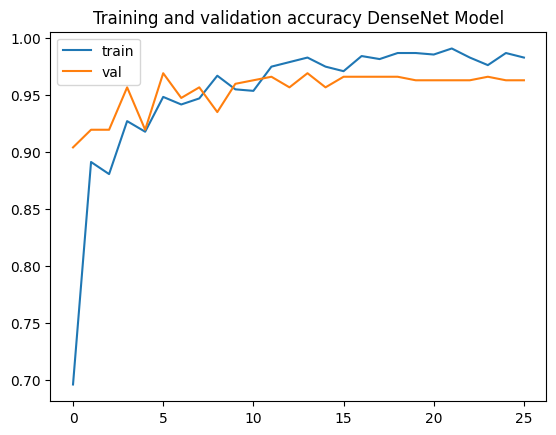

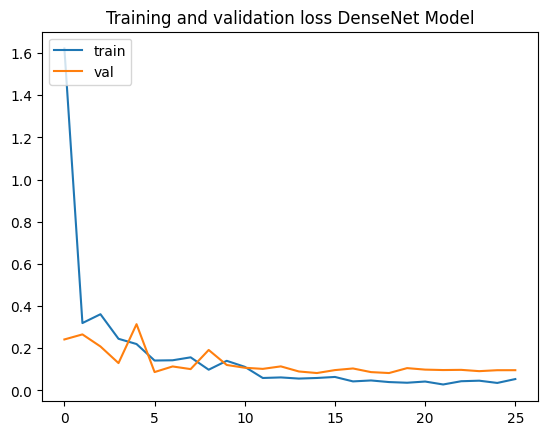

In [7]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_DenseNet121_model_1.history['accuracy' ]
val_acc  = history_DenseNet121_model_1.history['val_accuracy' ]
loss     = history_DenseNet121_model_1.history['loss' ]
val_loss = history_DenseNet121_model_1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy DenseNet Model')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss DenseNet Model')
plt.legend(['train', 'val'], loc='upper left')

# DenseNet 2

In [16]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="BellPaper_DenseNet2_model", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [17]:
# Define DIY Model
DenseNet121_model2 = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Average Pooling Layer
    tf.keras.layers.GlobalAveragePooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(5, activation='softmax') 
  ])
DenseNet121_model2.layers[0].trainable = False

# Compile Model
DenseNet121_model2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
DenseNet121_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 7,301,189
Trainable params: 263,685
Non-trainable params: 7,037,504
______________________________________

In [18]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_DenseNet121_model_2 = DenseNet121_model2.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 0.5671 - accuracy: 0.7745
Epoch 1: val_accuracy improved from -inf to 0.89474, saving model to BellPaper_DenseNet2_model


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


38/38 [==============================] - 42s 1s/step - loss: 0.5671 - accuracy: 0.7745 - val_loss: 0.2889 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 0.2247 - accuracy: 0.9098
Epoch 2: val_accuracy improved from 0.89474 to 0.94737, saving model to BellPaper_DenseNet2_model


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


38/38 [==============================] - 37s 985ms/step - loss: 0.2247 - accuracy: 0.9098 - val_loss: 0.1436 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.2133 - accuracy: 0.9138
Epoch 3: val_accuracy improved from 0.94737 to 0.95666, saving model to BellPaper_DenseNet2_model


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


38/38 [==============================] - 38s 1s/step - loss: 0.2133 - accuracy: 0.9138 - val_loss: 0.1231 - val_accuracy: 0.9567 - lr: 0.0010
Epoch 4/100
37/38 [============================>.] - ETA: 0s - loss: 0.1490 - accuracy: 0.9455
Epoch 4: val_accuracy improved from 0.95666 to 0.96285, saving model to BellPaper_DenseNet2_model


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


38/38 [==============================] - 37s 1s/step - loss: 0.1477 - accuracy: 0.9456 - val_loss: 0.1145 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 5/100
38/38 [==============================] - ETA: 0s - loss: 0.1186 - accuracy: 0.9589
Epoch 5: val_accuracy did not improve from 0.96285
38/38 [==============================] - 3s 72ms/step - loss: 0.1186 - accuracy: 0.9589 - val_loss: 0.1047 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 6/100
37/38 [============================>.] - ETA: 0s - loss: 0.1050 - accuracy: 0.9595
Epoch 6: val_accuracy did not improve from 0.96285
38/38 [==============================] - 3s 71ms/step - loss: 0.1060 - accuracy: 0.9589 - val_loss: 0.0992 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 7/100
37/38 [============================>.] - ETA: 0s - loss: 0.1005 - accuracy: 0.9632
Epoch 7: val_accuracy did not improve from 0.96285
38/38 [==============================] - 3s 72ms/step - loss: 0.0985 - accuracy: 0.9642 - val_loss: 0.1351 - val_accuracy: 0.9474 - lr

INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


38/38 [==============================] - 37s 1s/step - loss: 0.1014 - accuracy: 0.9615 - val_loss: 0.0771 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 10/100
38/38 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.9761
Epoch 10: val_accuracy did not improve from 0.96904
38/38 [==============================] - 3s 71ms/step - loss: 0.0826 - accuracy: 0.9761 - val_loss: 0.0771 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 11/100
37/38 [============================>.] - ETA: 0s - loss: 0.0719 - accuracy: 0.9768
Epoch 11: val_accuracy did not improve from 0.96904
38/38 [==============================] - 3s 70ms/step - loss: 0.0720 - accuracy: 0.9761 - val_loss: 0.0834 - val_accuracy: 0.9659 - lr: 0.0010
Epoch 12/100
38/38 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9761
Epoch 12: val_accuracy did not improve from 0.96904
38/38 [==============================] - 3s 70ms/step - loss: 0.0650 - accuracy: 0.9761 - val_loss: 0.0773 - val_accuracy: 0.959

INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


38/38 [==============================] - 38s 1s/step - loss: 0.0568 - accuracy: 0.9801 - val_loss: 0.0667 - val_accuracy: 0.9721 - lr: 0.0010
Epoch 14/100
38/38 [==============================] - ETA: 0s - loss: 0.0688 - accuracy: 0.9682
Epoch 14: val_accuracy did not improve from 0.97214
38/38 [==============================] - 3s 73ms/step - loss: 0.0688 - accuracy: 0.9682 - val_loss: 0.0638 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 15/100
38/38 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.9828
Epoch 15: val_accuracy did not improve from 0.97214
38/38 [==============================] - 3s 72ms/step - loss: 0.0500 - accuracy: 0.9828 - val_loss: 0.0745 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 16/100
38/38 [==============================] - ETA: 0s - loss: 0.0461 - accuracy: 0.9828
Epoch 16: val_accuracy improved from 0.97214 to 0.98142, saving model to BellPaper_DenseNet2_model


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


38/38 [==============================] - 37s 991ms/step - loss: 0.0461 - accuracy: 0.9828 - val_loss: 0.0516 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 17/100
38/38 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9867
Epoch 17: val_accuracy did not improve from 0.98142
38/38 [==============================] - 3s 72ms/step - loss: 0.0489 - accuracy: 0.9867 - val_loss: 0.0791 - val_accuracy: 0.9659 - lr: 0.0010
Epoch 18/100
38/38 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.9708
Epoch 18: val_accuracy did not improve from 0.98142
38/38 [==============================] - 3s 72ms/step - loss: 0.0698 - accuracy: 0.9708 - val_loss: 0.0574 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 19/100
38/38 [==============================] - ETA: 0s - loss: 0.0788 - accuracy: 0.9682
Epoch 19: val_accuracy did not improve from 0.98142
38/38 [==============================] - 3s 72ms/step - loss: 0.0788 - accuracy: 0.9682 - val_loss: 0.0657 - val_accuracy: 0.

INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


38/38 [==============================] - 38s 1s/step - loss: 0.0310 - accuracy: 0.9894 - val_loss: 0.0429 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 25/100
38/38 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9947
Epoch 25: val_accuracy improved from 0.98452 to 0.99381, saving model to BellPaper_DenseNet2_model


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


INFO:tensorflow:Assets written to: BellPaper_DenseNet2_model\assets


38/38 [==============================] - 37s 1s/step - loss: 0.0211 - accuracy: 0.9947 - val_loss: 0.0416 - val_accuracy: 0.9938 - lr: 0.0010
Epoch 26/100
38/38 [==============================] - ETA: 0s - loss: 0.0271 - accuracy: 0.9907
Epoch 26: val_accuracy did not improve from 0.99381
38/38 [==============================] - 3s 71ms/step - loss: 0.0271 - accuracy: 0.9907 - val_loss: 0.0399 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 27/100
38/38 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9867
Epoch 27: val_accuracy did not improve from 0.99381
38/38 [==============================] - 3s 70ms/step - loss: 0.0321 - accuracy: 0.9867 - val_loss: 0.0680 - val_accuracy: 0.9659 - lr: 0.0010
Epoch 28/100
37/38 [============================>.] - ETA: 0s - loss: 0.0481 - accuracy: 0.9796
Epoch 28: val_accuracy did not improve from 0.99381
38/38 [==============================] - 3s 73ms/step - loss: 0.0470 - accuracy: 0.9801 - val_loss: 0.0644 - val_accuracy: 0.962

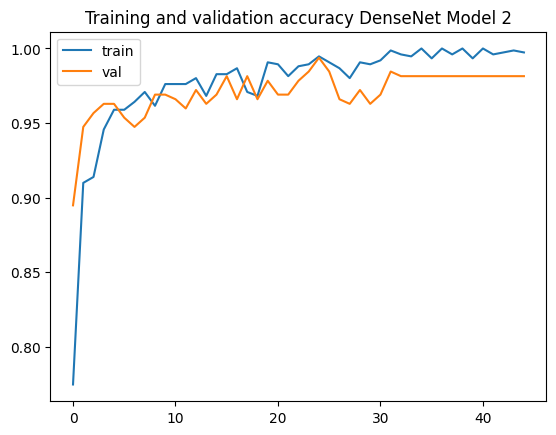

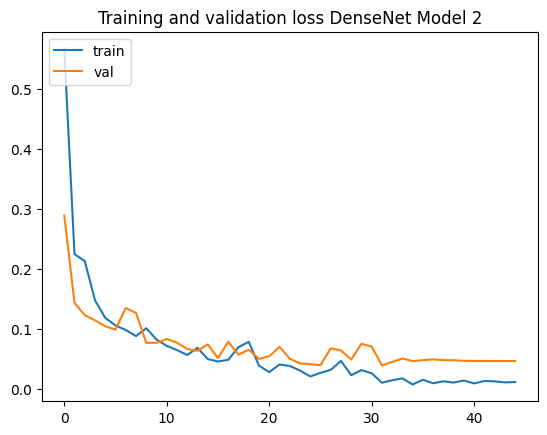

In [19]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_DenseNet121_model_2.history['accuracy' ]
val_acc  = history_DenseNet121_model_2.history['val_accuracy' ]
loss     = history_DenseNet121_model_2.history['loss' ]
val_loss = history_DenseNet121_model_2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy DenseNet Model 2')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss DenseNet Model 2')
plt.legend(['train', 'val'], loc='upper left')

# MobileNet V2

In [8]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="BellPaper_MobileNetV2_model", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [9]:
# Define DIY Model
MobileNetV2_model = tf.keras.models.Sequential([
    # MobileNetV2 Layer
    MobileNetV2(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(5, activation='softmax') 
  ])
MobileNetV2_model.layers[0].trainable = False

# Compile Model
MobileNetV2_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
MobileNetV2_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_1 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 2,587,205
Trainable params: 329,221
Non-

In [10]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_MobileNetV2_model_1 = MobileNetV2_model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 2.0969 - accuracy: 0.7056
Epoch 1: val_accuracy improved from -inf to 0.88854, saving model to BellPaper_MobileNetV2_model


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


38/38 [==============================] - 19s 459ms/step - loss: 2.0969 - accuracy: 0.7056 - val_loss: 0.3699 - val_accuracy: 0.8885 - lr: 0.0010
Epoch 2/100
37/38 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.8747
Epoch 2: val_accuracy improved from 0.88854 to 0.92879, saving model to BellPaper_MobileNetV2_model


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


38/38 [==============================] - 15s 407ms/step - loss: 0.4360 - accuracy: 0.8780 - val_loss: 0.2508 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 3/100
37/38 [============================>.] - ETA: 0s - loss: 0.2554 - accuracy: 0.9305
Epoch 3: val_accuracy improved from 0.92879 to 0.95046, saving model to BellPaper_MobileNetV2_model


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


38/38 [==============================] - 15s 408ms/step - loss: 0.2525 - accuracy: 0.9310 - val_loss: 0.1894 - val_accuracy: 0.9505 - lr: 0.0010
Epoch 4/100
38/38 [==============================] - ETA: 0s - loss: 0.1345 - accuracy: 0.9589
Epoch 4: val_accuracy did not improve from 0.95046
38/38 [==============================] - 2s 41ms/step - loss: 0.1345 - accuracy: 0.9589 - val_loss: 0.1692 - val_accuracy: 0.9443 - lr: 0.0010
Epoch 5/100
37/38 [============================>.] - ETA: 0s - loss: 0.0839 - accuracy: 0.9687
Epoch 5: val_accuracy improved from 0.95046 to 0.95975, saving model to BellPaper_MobileNetV2_model


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


38/38 [==============================] - 15s 396ms/step - loss: 0.0836 - accuracy: 0.9682 - val_loss: 0.1367 - val_accuracy: 0.9598 - lr: 0.0010
Epoch 6/100
36/38 [===========================>..] - ETA: 0s - loss: 0.0950 - accuracy: 0.9580
Epoch 6: val_accuracy did not improve from 0.95975
38/38 [==============================] - 2s 40ms/step - loss: 0.0919 - accuracy: 0.9589 - val_loss: 0.2840 - val_accuracy: 0.9195 - lr: 0.0010
Epoch 7/100
38/38 [==============================] - ETA: 0s - loss: 0.1106 - accuracy: 0.9589
Epoch 7: val_accuracy did not improve from 0.95975
38/38 [==============================] - 2s 41ms/step - loss: 0.1106 - accuracy: 0.9589 - val_loss: 0.0981 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 8/100
38/38 [==============================] - ETA: 0s - loss: 0.0756 - accuracy: 0.9708
Epoch 8: val_accuracy did not improve from 0.95975
38/38 [==============================] - 2s 39ms/step - loss: 0.0756 - accuracy: 0.9708 - val_loss: 0.1149 - val_accuracy: 0.9567 -

INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


38/38 [==============================] - 15s 403ms/step - loss: 0.0663 - accuracy: 0.9735 - val_loss: 0.0775 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 10/100
38/38 [==============================] - ETA: 0s - loss: 0.0604 - accuracy: 0.9788
Epoch 10: val_accuracy improved from 0.96285 to 0.96904, saving model to BellPaper_MobileNetV2_model


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


38/38 [==============================] - 15s 388ms/step - loss: 0.0604 - accuracy: 0.9788 - val_loss: 0.0718 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 11/100
37/38 [============================>.] - ETA: 0s - loss: 0.0588 - accuracy: 0.9823
Epoch 11: val_accuracy did not improve from 0.96904
38/38 [==============================] - 2s 42ms/step - loss: 0.0574 - accuracy: 0.9828 - val_loss: 0.0983 - val_accuracy: 0.9598 - lr: 0.0010
Epoch 12/100
37/38 [============================>.] - ETA: 0s - loss: 0.0356 - accuracy: 0.9905
Epoch 12: val_accuracy did not improve from 0.96904
38/38 [==============================] - 2s 41ms/step - loss: 0.0352 - accuracy: 0.9907 - val_loss: 0.1068 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 13/100
38/38 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.9920
Epoch 13: val_accuracy improved from 0.96904 to 0.97214, saving model to BellPaper_MobileNetV2_model


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


38/38 [==============================] - 15s 400ms/step - loss: 0.0238 - accuracy: 0.9920 - val_loss: 0.0700 - val_accuracy: 0.9721 - lr: 0.0010
Epoch 14/100
37/38 [============================>.] - ETA: 0s - loss: 0.0338 - accuracy: 0.9891
Epoch 14: val_accuracy did not improve from 0.97214
38/38 [==============================] - 2s 40ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0701 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 15/100
37/38 [============================>.] - ETA: 0s - loss: 0.0233 - accuracy: 0.9905
Epoch 15: val_accuracy did not improve from 0.97214
38/38 [==============================] - 2s 43ms/step - loss: 0.0230 - accuracy: 0.9907 - val_loss: 0.1877 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 16/100
37/38 [============================>.] - ETA: 0s - loss: 0.0979 - accuracy: 0.9659
Epoch 16: val_accuracy did not improve from 0.97214
38/38 [==============================] - 1s 39ms/step - loss: 0.0980 - accuracy: 0.9655 - val_loss: 0.2086 - val_accuracy: 0.

INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model\assets


38/38 [==============================] - 15s 404ms/step - loss: 0.0204 - accuracy: 0.9907 - val_loss: 0.0581 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 18/100
37/38 [============================>.] - ETA: 0s - loss: 0.0279 - accuracy: 0.9864
Epoch 18: val_accuracy did not improve from 0.97833
38/38 [==============================] - 2s 38ms/step - loss: 0.0272 - accuracy: 0.9867 - val_loss: 0.0984 - val_accuracy: 0.9659 - lr: 0.0010
Epoch 19/100
38/38 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9867
Epoch 19: val_accuracy did not improve from 0.97833
38/38 [==============================] - 2s 40ms/step - loss: 0.0411 - accuracy: 0.9867 - val_loss: 0.1324 - val_accuracy: 0.9598 - lr: 0.0010
Epoch 20/100
37/38 [============================>.] - ETA: 0s - loss: 0.0930 - accuracy: 0.9741
Epoch 20: val_accuracy did not improve from 0.97833
38/38 [==============================] - 1s 38ms/step - loss: 0.0907 - accuracy: 0.9748 - val_loss: 0.4815 - val_accuracy: 0.

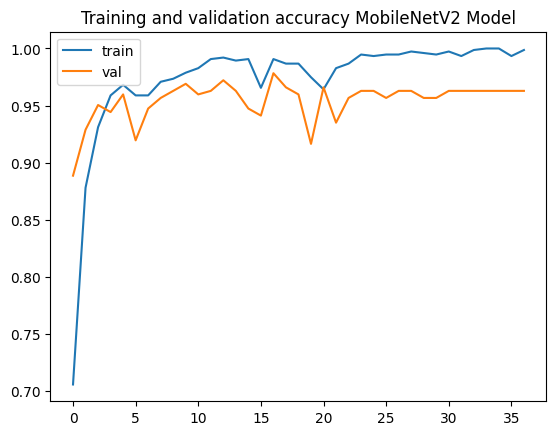

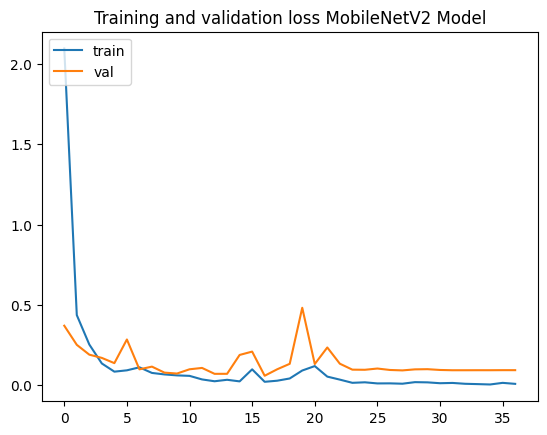

In [11]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_MobileNetV2_model_1.history['accuracy' ]
val_acc  = history_MobileNetV2_model_1.history['val_accuracy' ]
loss     = history_MobileNetV2_model_1.history['loss' ]
val_loss = history_MobileNetV2_model_1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy MobileNetV2 Model')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNetV2 Model')
plt.legend(['train', 'val'], loc='upper left')

# MobileNetV2 2

In [20]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="BellPaper_MobileNetV2_model2", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [21]:
# Define DIY Model
MobileNetV2_model2 = tf.keras.models.Sequential([
    # MobileNetV2 Layer
    MobileNetV2(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Average Pooling Layer
    tf.keras.layers.GlobalAveragePooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(5, activation='softmax') 
  ])
MobileNetV2_model2.layers[0].trainable = False

# Compile Model
MobileNetV2_model2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
MobileNetV2_model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               327936    
                                                                 
 dense_9 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 2,587,205
Trainable params: 329,221
Non-

In [22]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_MobileNetV2_model_2 = MobileNetV2_model2.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
37/38 [============================>.] - ETA: 0s - loss: 0.4602 - accuracy: 0.8106
Epoch 1: val_accuracy improved from -inf to 0.89164, saving model to BellPaper_MobileNetV2_model2


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


38/38 [==============================] - 19s 470ms/step - loss: 0.4622 - accuracy: 0.8090 - val_loss: 0.2160 - val_accuracy: 0.8916 - lr: 0.0010
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 0.1976 - accuracy: 0.9310
Epoch 2: val_accuracy improved from 0.89164 to 0.92570, saving model to BellPaper_MobileNetV2_model2


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


38/38 [==============================] - 17s 454ms/step - loss: 0.1976 - accuracy: 0.9310 - val_loss: 0.1829 - val_accuracy: 0.9257 - lr: 0.0010
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.0968 - accuracy: 0.9642
Epoch 3: val_accuracy improved from 0.92570 to 0.95356, saving model to BellPaper_MobileNetV2_model2


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


38/38 [==============================] - 16s 420ms/step - loss: 0.0968 - accuracy: 0.9642 - val_loss: 0.1137 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 4/100
38/38 [==============================] - ETA: 0s - loss: 0.0709 - accuracy: 0.9775
Epoch 4: val_accuracy improved from 0.95356 to 0.95975, saving model to BellPaper_MobileNetV2_model2


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


38/38 [==============================] - 16s 426ms/step - loss: 0.0709 - accuracy: 0.9775 - val_loss: 0.1045 - val_accuracy: 0.9598 - lr: 0.0010
Epoch 5/100
37/38 [============================>.] - ETA: 0s - loss: 0.0660 - accuracy: 0.9673
Epoch 5: val_accuracy did not improve from 0.95975
38/38 [==============================] - 3s 59ms/step - loss: 0.0649 - accuracy: 0.9682 - val_loss: 0.0991 - val_accuracy: 0.9567 - lr: 0.0010
Epoch 6/100
37/38 [============================>.] - ETA: 0s - loss: 0.0556 - accuracy: 0.9796
Epoch 6: val_accuracy did not improve from 0.95975
38/38 [==============================] - 2s 62ms/step - loss: 0.0560 - accuracy: 0.9788 - val_loss: 0.1008 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 7/100
38/38 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9881
Epoch 7: val_accuracy improved from 0.95975 to 0.96904, saving model to BellPaper_MobileNetV2_model2


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


38/38 [==============================] - 16s 431ms/step - loss: 0.0429 - accuracy: 0.9881 - val_loss: 0.0788 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 8/100
38/38 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9881
Epoch 8: val_accuracy did not improve from 0.96904
38/38 [==============================] - 3s 64ms/step - loss: 0.0336 - accuracy: 0.9881 - val_loss: 0.0945 - val_accuracy: 0.9659 - lr: 0.0010
Epoch 9/100
38/38 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9841
Epoch 9: val_accuracy did not improve from 0.96904
38/38 [==============================] - 2s 62ms/step - loss: 0.0468 - accuracy: 0.9841 - val_loss: 0.1232 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 10/100
38/38 [==============================] - ETA: 0s - loss: 0.0307 - accuracy: 0.9881
Epoch 10: val_accuracy did not improve from 0.96904
38/38 [==============================] - 3s 66ms/step - loss: 0.0307 - accuracy: 0.9881 - val_loss: 0.0856 - val_accuracy: 0.9598

INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


INFO:tensorflow:Assets written to: BellPaper_MobileNetV2_model2\assets


38/38 [==============================] - 16s 428ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9721 - lr: 1.0000e-04
Epoch 24/100
38/38 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9987
Epoch 24: val_accuracy did not improve from 0.97214
38/38 [==============================] - 3s 63ms/step - loss: 0.0074 - accuracy: 0.9987 - val_loss: 0.0738 - val_accuracy: 0.9721 - lr: 1.0000e-04
Epoch 25/100
38/38 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9987
Epoch 25: val_accuracy did not improve from 0.97214
38/38 [==============================] - 2s 63ms/step - loss: 0.0096 - accuracy: 0.9987 - val_loss: 0.0754 - val_accuracy: 0.9690 - lr: 1.0000e-04
Epoch 26/100
37/38 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9986
Epoch 26: val_accuracy did not improve from 0.97214
38/38 [==============================] - 2s 62ms/step - loss: 0.0089 - accuracy: 0.9987 - val_loss: 0.0748 - val_

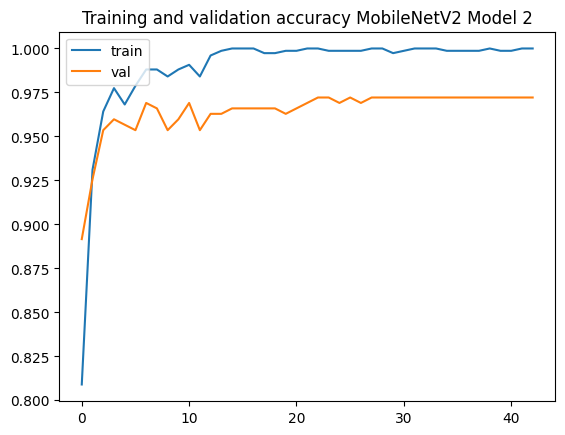

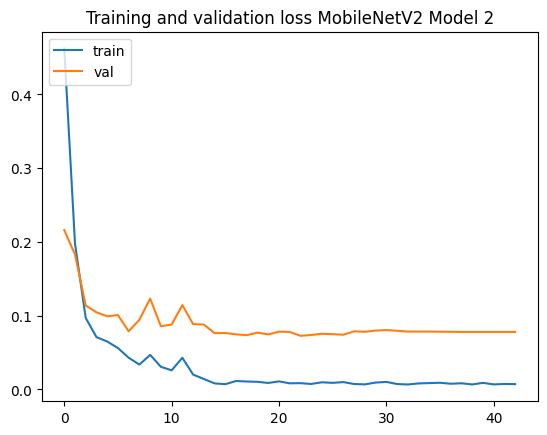

In [23]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_MobileNetV2_model_2.history['accuracy' ]
val_acc  = history_MobileNetV2_model_2.history['val_accuracy' ]
loss     = history_MobileNetV2_model_2.history['loss' ]
val_loss = history_MobileNetV2_model_2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy MobileNetV2 Model 2')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNetV2 Model 2')
plt.legend(['train', 'val'], loc='upper left')

# Xception

In [12]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="BellPaper_Xception_model", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [13]:
# Define Model
Xception_model = tf.keras.models.Sequential([
    # Xception Layer
    Xception(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(5, activation='softmax') 
  ])
Xception_model.layers[0].trainable = False

# Compile Model
Xception_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
Xception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_max_pooling2d_2 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21,387,309
Trainable params: 525,829
Non-trainable params: 20,861,480
____________________________________

In [14]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_Xception_model_1 = Xception_model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 1.2460 - accuracy: 0.7493
Epoch 1: val_accuracy improved from -inf to 0.82043, saving model to BellPaper_Xception_model


INFO:tensorflow:Assets written to: BellPaper_Xception_model\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model\assets


38/38 [==============================] - 20s 445ms/step - loss: 1.2460 - accuracy: 0.7493 - val_loss: 0.4302 - val_accuracy: 0.8204 - lr: 0.0010
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 0.2138 - accuracy: 0.9151
Epoch 2: val_accuracy improved from 0.82043 to 0.91641, saving model to BellPaper_Xception_model


INFO:tensorflow:Assets written to: BellPaper_Xception_model\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model\assets


38/38 [==============================] - 15s 409ms/step - loss: 0.2138 - accuracy: 0.9151 - val_loss: 0.1896 - val_accuracy: 0.9164 - lr: 0.0010
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.1423 - accuracy: 0.9443
Epoch 3: val_accuracy did not improve from 0.91641
38/38 [==============================] - 3s 82ms/step - loss: 0.1423 - accuracy: 0.9443 - val_loss: 0.2572 - val_accuracy: 0.8978 - lr: 0.0010
Epoch 4/100
38/38 [==============================] - ETA: 0s - loss: 0.1162 - accuracy: 0.9549
Epoch 4: val_accuracy did not improve from 0.91641
38/38 [==============================] - 3s 84ms/step - loss: 0.1162 - accuracy: 0.9549 - val_loss: 0.2105 - val_accuracy: 0.8978 - lr: 0.0010
Epoch 5/100
38/38 [==============================] - ETA: 0s - loss: 0.0881 - accuracy: 0.9708
Epoch 5: val_accuracy improved from 0.91641 to 0.93189, saving model to BellPaper_Xception_model


INFO:tensorflow:Assets written to: BellPaper_Xception_model\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model\assets


38/38 [==============================] - 15s 415ms/step - loss: 0.0881 - accuracy: 0.9708 - val_loss: 0.1600 - val_accuracy: 0.9319 - lr: 0.0010
Epoch 6/100
38/38 [==============================] - ETA: 0s - loss: 0.0624 - accuracy: 0.9761
Epoch 6: val_accuracy did not improve from 0.93189
38/38 [==============================] - 3s 82ms/step - loss: 0.0624 - accuracy: 0.9761 - val_loss: 0.2941 - val_accuracy: 0.9102 - lr: 0.0010
Epoch 7/100
38/38 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9496
Epoch 7: val_accuracy did not improve from 0.93189
38/38 [==============================] - 3s 82ms/step - loss: 0.1178 - accuracy: 0.9496 - val_loss: 0.1816 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 8/100
38/38 [==============================] - ETA: 0s - loss: 0.1121 - accuracy: 0.9589
Epoch 8: val_accuracy did not improve from 0.93189
38/38 [==============================] - 3s 83ms/step - loss: 0.1121 - accuracy: 0.9589 - val_loss: 0.6678 - val_accuracy: 0.8452 -

INFO:tensorflow:Assets written to: BellPaper_Xception_model\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model\assets



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
38/38 [==============================] - 15s 412ms/step - loss: 0.0357 - accuracy: 0.9854 - val_loss: 0.1605 - val_accuracy: 0.9412 - lr: 0.0010
Epoch 11/100
38/38 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9973
Epoch 11: val_accuracy improved from 0.94118 to 0.94737, saving model to BellPaper_Xception_model


INFO:tensorflow:Assets written to: BellPaper_Xception_model\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model\assets


38/38 [==============================] - 16s 417ms/step - loss: 0.0209 - accuracy: 0.9973 - val_loss: 0.1537 - val_accuracy: 0.9474 - lr: 1.0000e-04
Epoch 12/100
38/38 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9973
Epoch 12: val_accuracy did not improve from 0.94737
38/38 [==============================] - 3s 82ms/step - loss: 0.0167 - accuracy: 0.9973 - val_loss: 0.1578 - val_accuracy: 0.9443 - lr: 1.0000e-04
Epoch 13/100
38/38 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 0.9960
Epoch 13: val_accuracy did not improve from 0.94737
38/38 [==============================] - 3s 82ms/step - loss: 0.0163 - accuracy: 0.9960 - val_loss: 0.1644 - val_accuracy: 0.9443 - lr: 1.0000e-04
Epoch 14/100
38/38 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9960
Epoch 14: val_accuracy did not improve from 0.94737
38/38 [==============================] - 3s 83ms/step - loss: 0.0192 - accuracy: 0.9960 - val_loss: 0.1595 - val_

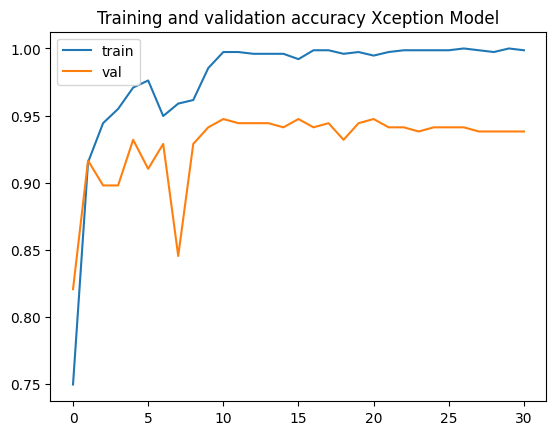

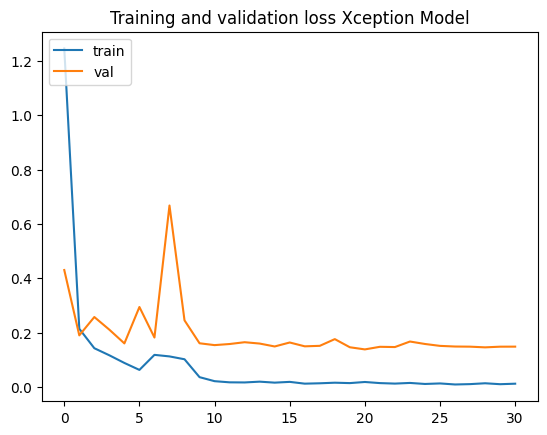

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Xception_model_1.history['accuracy' ]
val_acc  = history_Xception_model_1.history['val_accuracy' ]
loss     = history_Xception_model_1.history['loss' ]
val_loss = history_Xception_model_1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy Xception Model')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss Xception Model')
plt.legend(['train', 'val'], loc='upper left')

# Xception 2

In [24]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="BellPaper_Xception_model2", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [25]:
# Define Model
Xception_model2 = tf.keras.models.Sequential([
    # Xception Layer
    Xception(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Average Pooling Layer
    tf.keras.layers.GlobalAveragePooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(5, activation='softmax') 
  ])
Xception_model2.layers[0].trainable = False

# Compile Model
Xception_model2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
Xception_model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dense_11 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 21,387,309
Trainable params: 525,829
Non-trainable params: 20,861,480
____________________________________

In [26]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_Xception_model_2 = Xception_model2.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 0.4724 - accuracy: 0.8077
Epoch 1: val_accuracy improved from -inf to 0.86997, saving model to BellPaper_Xception_model2


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


38/38 [==============================] - 19s 447ms/step - loss: 0.4724 - accuracy: 0.8077 - val_loss: 0.3340 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 0.1492 - accuracy: 0.9403
Epoch 2: val_accuracy improved from 0.86997 to 0.92570, saving model to BellPaper_Xception_model2


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


38/38 [==============================] - 16s 421ms/step - loss: 0.1492 - accuracy: 0.9403 - val_loss: 0.1867 - val_accuracy: 0.9257 - lr: 0.0010
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.0896 - accuracy: 0.9708
Epoch 3: val_accuracy improved from 0.92570 to 0.93498, saving model to BellPaper_Xception_model2


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


38/38 [==============================] - 16s 408ms/step - loss: 0.0896 - accuracy: 0.9708 - val_loss: 0.1528 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 4/100
38/38 [==============================] - ETA: 0s - loss: 0.0713 - accuracy: 0.9801
Epoch 4: val_accuracy did not improve from 0.93498
38/38 [==============================] - 3s 83ms/step - loss: 0.0713 - accuracy: 0.9801 - val_loss: 0.1526 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 5/100
38/38 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9867
Epoch 5: val_accuracy did not improve from 0.93498
38/38 [==============================] - 3s 83ms/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.1780 - val_accuracy: 0.9319 - lr: 0.0010
Epoch 6/100
38/38 [==============================] - ETA: 0s - loss: 0.1281 - accuracy: 0.9509
Epoch 6: val_accuracy did not improve from 0.93498
38/38 [==============================] - 3s 84ms/step - loss: 0.1281 - accuracy: 0.9509 - val_loss: 0.2293 - val_accuracy: 0.9226 -

INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
38/38 [==============================] - 16s 435ms/step - loss: 0.0352 - accuracy: 0.9854 - val_loss: 0.1935 - val_accuracy: 0.9412 - lr: 0.0010
Epoch 10/100
38/38 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9947
Epoch 10: val_accuracy improved from 0.94118 to 0.94737, saving model to BellPaper_Xception_model2


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


38/38 [==============================] - 16s 416ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.1597 - val_accuracy: 0.9474 - lr: 1.0000e-04
Epoch 11/100
38/38 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 1.0000
Epoch 11: val_accuracy improved from 0.94737 to 0.95356, saving model to BellPaper_Xception_model2


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


38/38 [==============================] - 16s 423ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.1585 - val_accuracy: 0.9536 - lr: 1.0000e-04
Epoch 12/100
38/38 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9987
Epoch 12: val_accuracy did not improve from 0.95356
38/38 [==============================] - 3s 83ms/step - loss: 0.0131 - accuracy: 0.9987 - val_loss: 0.1508 - val_accuracy: 0.9536 - lr: 1.0000e-04
Epoch 13/100
38/38 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 1.0000
Epoch 13: val_accuracy improved from 0.95356 to 0.95666, saving model to BellPaper_Xception_model2


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


38/38 [==============================] - 16s 429ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.1519 - val_accuracy: 0.9567 - lr: 1.0000e-04
Epoch 14/100
38/38 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 1.0000
Epoch 14: val_accuracy did not improve from 0.95666
38/38 [==============================] - 3s 83ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.1505 - val_accuracy: 0.9536 - lr: 1.0000e-04
Epoch 15/100
37/38 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 1.0000
Epoch 15: val_accuracy did not improve from 0.95666
38/38 [==============================] - 3s 83ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.1521 - val_accuracy: 0.9567 - lr: 1.0000e-04
Epoch 16/100
38/38 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9987
Epoch 16: val_accuracy did not improve from 0.95666
38/38 [==============================] - 3s 85ms/step - loss: 0.0101 - accuracy: 0.9987 - val_loss: 0.1531 - val_

INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


38/38 [==============================] - 15s 415ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.1440 - val_accuracy: 0.9598 - lr: 1.0000e-04
Epoch 26/100
38/38 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 1.0000
Epoch 26: val_accuracy did not improve from 0.95975
38/38 [==============================] - 3s 84ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.1531 - val_accuracy: 0.9536 - lr: 1.0000e-04
Epoch 27/100
38/38 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 27: val_accuracy did not improve from 0.95975
38/38 [==============================] - 3s 83ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.1460 - val_accuracy: 0.9598 - lr: 1.0000e-04
Epoch 28/100
38/38 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 1.0000
Epoch 28: val_accuracy did not improve from 0.95975
38/38 [==============================] - 3s 82ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.1443 - val_

INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets


INFO:tensorflow:Assets written to: BellPaper_Xception_model2\assets



Epoch 30: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
38/38 [==============================] - 15s 416ms/step - loss: 0.0090 - accuracy: 0.9987 - val_loss: 0.1439 - val_accuracy: 0.9628 - lr: 1.0000e-04
Epoch 31/100
38/38 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 0.96285
38/38 [==============================] - 3s 84ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.1440 - val_accuracy: 0.9567 - lr: 1.0000e-05
Epoch 32/100
38/38 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 1.0000
Epoch 32: val_accuracy did not improve from 0.96285
38/38 [==============================] - 3s 84ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1450 - val_accuracy: 0.9598 - lr: 1.0000e-05
Epoch 33/100
38/38 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 33: val_accuracy did not improve from 0.96285
38/38 [===========================

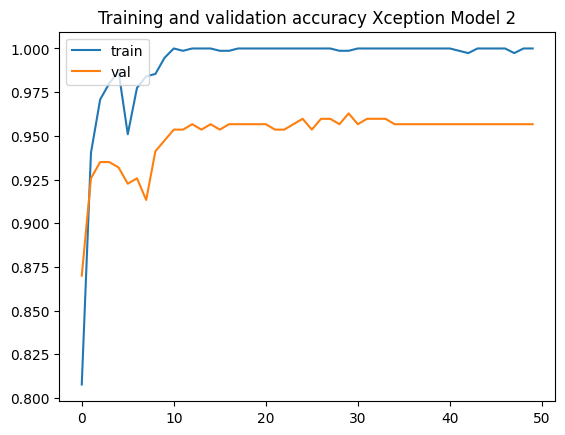

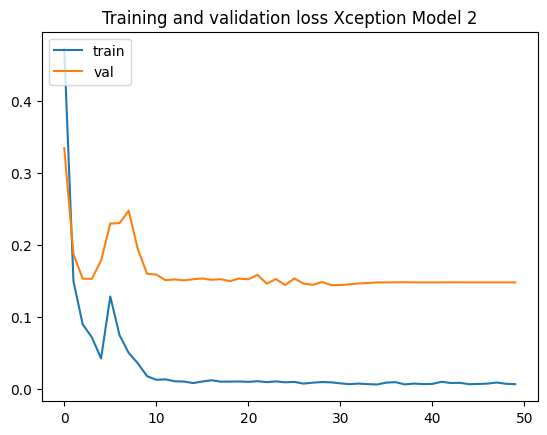

In [27]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Xception_model_2.history['accuracy' ]
val_acc  = history_Xception_model_2.history['val_accuracy' ]
loss     = history_Xception_model_2.history['loss' ]
val_loss = history_Xception_model_2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy Xception Model 2')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss Xception Model 2')
plt.legend(['train', 'val'], loc='upper left')